https://aotamasaki.hatenablog.com/entry/2018/07/28/220102

In [1]:
import scipy as sp
from sklearn.datasets import fetch_openml
from sklearn import datasets, model_selection, metrics
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [2]:
digits = datasets.load_digits()

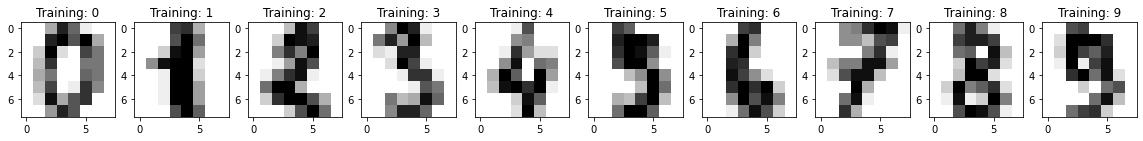

In [3]:
num=10
fig, axes = plt.subplots(1,num,figsize=(20,4))
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:num]):
    # ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)


In [54]:
X=digits.data
y=digits.target
X.shape

(1797, 64)

# sklearn t-SNE

In [65]:
X_embedded=TSNE(n_components=2,random_state=5).fit_transform(X)


In [57]:
X_embedded.shape

(1797, 2)

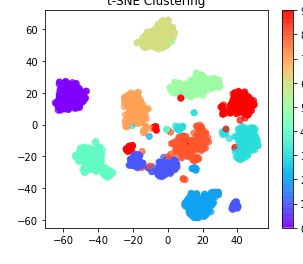

In [66]:
plt.figure(figsize=(5,4))
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target,alpha=0.7,cmap='rainbow')
plt.colorbar()
plt.title("t-SNE Clustering")
plt.show()

# UMAP

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify=digits.target,
                                                    random_state=42)
print("訓練データの数",len(y_train),"\tテストデータの数",len(y_test))

訓練データの数 1347 	テストデータの数 450


Wall time: 5.39 s


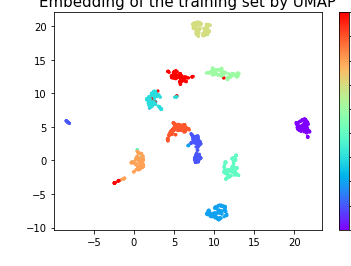

In [5]:
import umap

%time trans = umap.UMAP(n_neighbors=5,n_components=2, random_state=42).fit(X_train)

plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=y_train, cmap='rainbow')
plt.colorbar()
plt.title('Embedding of the training set by UMAP', fontsize=15)
plt.show()

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [7]:
#SVMでの学習
svc = SVC().fit(trans.embedding_, y_train)
#k-近傍法での学習
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)

In [8]:
#処理時間を測るために%timeをしている
#やはりsklearnと同様にtransformで、データを加工する
%time test_embedding = trans.transform(X_test)

Wall time: 3.41 s


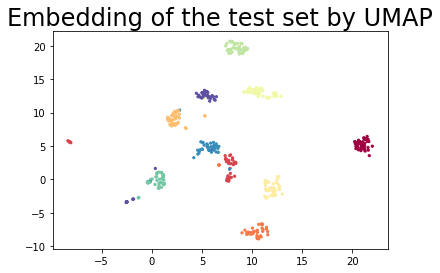

In [9]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.title('Embedding of the test set by UMAP', fontsize=24)
plt.show()

In [10]:
print(
    "SVM:", svc.score(test_embedding, y_test), 
    "\nk-近傍",knn.score(test_embedding, y_test))

SVM: 0.9666666666666667 
k-近傍 0.9822222222222222


In [11]:
svc = SVC().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
print(
    "SVM:", svc.score(X_test, y_test), 
    "\nk-近傍:",knn.score(X_test, y_test))

SVM: 0.9911111111111112 
k-近傍: 0.9844444444444445
